In [1]:
import math
import numpy as np
import pandas as pd
from graphviz import Digraph
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
class Value: 
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        result = Value(self.data + other.data, (self, other), '+')
        return result

    def __mul__(self, other):
        result = Value(self.data * other.data, (self, other), '*')
        return result

In [15]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label = "{ data %.4f }" % (n.data, ), shape='record')
        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [43]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b
e.label = 'e'
d = e + c
d.label = 'd'
d

Value(data=4.0)

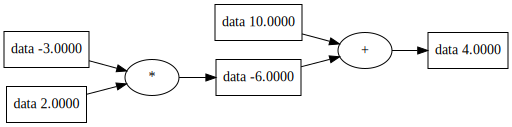

In [23]:
draw_dot(d)

In [53]:
for n in nodes:
    uid = str(id(n))
    dot.node(name=uid, label = "{data %.4f}" % (n.data,))
    




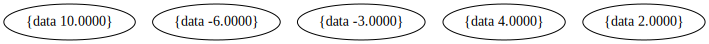

In [57]:
dot

In [61]:
x = 1
print("{data %}" % (x))

ValueError: unsupported format character '}' (0x7d) at index 7